In [1]:
%pylab inline
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sb

# Multivariate Analysis 

Source signal: Z' boson with a Mass of __1250 GeV__

The following analysis is made for the search of a Z' Boson Vector.

In [3]:
# Import random sample from ROOT
signal = pd.read_csv('randomSampleNoCuts/joined_signal_1p25TeV.root.csv')
signal.head()

,type,Tau_PT_sum,Tau_PT_dif,Tau_PT_1,Tau_PT_2,Tau_Mass_sum,Tau_Mass_dif,Tau_Mass_1,Tau_Mass_2,Tau_Ener_sum,...,Jet_Mass_sum,Jet_Mass_dif,Jet_Mass_1,Jet_Mass_2,Jet_Ener_sum,Jet_Ener_1,Jet_Ener_2,Jet_Eta_dif,Jet_Eta_1,Jet_Eta_2
0,1,304.524,144.2480,224.386,80.1380,6.69851,2.38294,4.54072,2.157780,619.613,...,35.8304,19.34650,27.58850,8.24198,2459.430,875.462,1583.9700,-5.71657,-1.63025,4.086330
1,1,195.575,142.6620,169.119,26.4564,4.26522,-4.26522,0.00000,4.265220,199.439,...,14.7965,3.03834,8.91740,5.87906,293.784,241.248,52.5363,3.23211,1.83898,-1.393130
2,1,652.828,119.9390,386.384,266.4450,9.08889,9.08888,9.08889,0.000004,728.199,...,111.2140,62.85880,87.03660,24.17780,1646.650,772.064,874.5890,-3.71967,-1.50563,2.214040
3,1,583.136,136.7630,359.950,223.1860,67.35950,65.05440,66.20700,1.152560,1813.790,...,15.5964,2.97881,9.28759,6.30878,2011.810,1969.400,42.4134,3.79642,3.52221,-0.274206
4,1,142.686,63.4504,103.068,39.6176,4.88138,1.23395,3.05767,1.823710,425.475,...,28.5942,8.79155,18.69290,9.90130,1401.060,1076.000,325.0650,-4.71687,-2.88507,1.831800


Let's see some descriptive statistics from raw data 

In [4]:
signal.describe()

,type,Tau_PT_sum,Tau_PT_dif,Tau_PT_1,Tau_PT_2,Tau_Mass_sum,Tau_Mass_dif,Tau_Mass_1,Tau_Mass_2,Tau_Ener_sum,...,Jet_Mass_sum,Jet_Mass_dif,Jet_Mass_1,Jet_Mass_2,Jet_Ener_sum,Jet_Ener_1,Jet_Ener_2,Jet_Eta_dif,Jet_Eta_1,Jet_Eta_2
count,1472.00000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,...,1472.000000,1472.000000,1.472000e+03,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000
mean,0.50000,234.287704,98.001642,166.144671,68.143016,8.495390,2.484207,5.489798,3.005591,410.636872,...,31.968358,13.494132,2.273125e+01,9.237114,1061.583988,540.322370,521.261686,0.096118,0.014117,-0.082001
std,0.50017,232.099882,126.127518,168.738011,80.104381,9.802690,8.732999,7.909891,4.859286,365.720610,...,30.361621,22.120012,2.477571e+01,9.577354,990.120700,575.696384,632.082132,3.918733,1.760138,2.420422
min,0.00000,17.386300,0.013708,8.708890,7.543480,-0.000006,-102.615000,-0.000015,-0.000015,24.289600,...,-0.000002,-69.863300,-9.536740e-07,-0.000048,20.304800,10.003700,8.921180,-7.731700,-4.710270,-4.892910
25%,0.00000,60.903275,12.852400,39.379725,18.376675,3.253132,-0.918154,1.314893,0.993406,120.486500,...,8.609842,0.972910,5.390525e+00,2.601018,167.588250,82.890625,42.631175,-3.735352,-1.450275,-2.242510
50%,0.50000,136.485500,38.364800,89.952150,37.034550,5.525630,1.034460,2.961160,1.902395,297.913000,...,20.357300,4.461980,1.217265e+01,6.047325,801.182000,370.131000,259.581000,0.766420,0.089250,-0.150969
75%,1.00000,366.700500,137.646750,256.497500,86.246125,10.213025,4.031593,6.564540,3.455325,594.792000,...,43.567175,18.003100,2.864560e+01,12.731575,1787.437500,802.326500,801.998000,3.793248,1.498598,2.126943
max,1.00000,1925.890000,896.002000,1409.750000,730.112000,151.145000,84.309600,85.952800,126.880000,3254.940000,...,153.864000,97.499900,1.062410e+02,87.194200,5145.800000,3982.120000,4202.800000,7.354060,4.390120,4.990630


Let's see the distributions of each varaible by type of event. These graphs were generated with ROOT

In [5]:
# import and show graphs

From the below images we can see that some variables don't have variance and others don't have classification power:
    - Tau_Eta_1, Tau_Eta_2, Tau_Eta_dif
    - Tau_Charge_1, Tau_Charge_2, Tau_Charge_max
    - Tau_DeltaPhi, Tau_DeltaEta,
In the other hand, some variables could have easier discrimitation between signal and background if we take the absolute value. These variables are:
    - Jet_PT_dif, Tau_PT_dif 
    - Tau_Mass_dif, Jet_Mass_dif
    - Jet_PT_dif, Tau_PT_dif
    - Tau_Mass_dif, Jet_Mass_dif
    - Jet_Eta_dif, Jet_Eta_1, Jet_Eta_1
    - Tau_Eta_dif, Tau_Eta_1, Tau_Eta_2

In [6]:
signal[['Jet_PT_dif','Tau_PT_dif','Tau_Mass_dif','Jet_Mass_dif']] = signal[['Jet_PT_dif','Tau_PT_dif','Tau_Mass_dif','Jet_Mass_dif']].abs()
signal[['Jet_Eta_dif','Jet_Eta_1','Jet_Eta_1','Tau_Eta_dif','Tau_Eta_1','Tau_Eta_2']] = signal[['Jet_Eta_dif','Jet_Eta_1','Jet_Eta_1','Tau_Eta_dif','Tau_Eta_1','Tau_Eta_2']].abs()

In [7]:
# Divide the data between dependent and independent variables
Xsignal = signal.drop(['type'],axis=1)
Ysignal = signal['type']

# Exploratory Analysis

### Correlation Matrix

In order to look for the most important variables to classify each event between __signal__ and __Background__ we can calculate the matrix of correlations of the whole data set. We expect that higher correlations could have higher predictable power. As a side effect of this tool we can look for the presence of *multicolinearity* in the data.

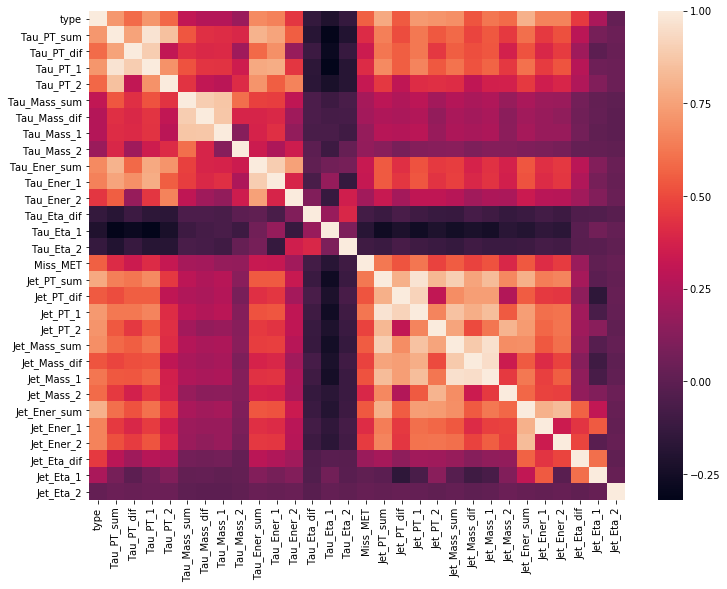

In [8]:
corrmat = signal.corr()
f,ax =  plt.subplots(figsize=(12,9))
sb.heatmap(corrmat);

From the previous **heatmap**, first we can see that **Jet/Tau_Eta_1/2/dif** variables almost don't have any correlation with the other variables. Second, according to the *Vector Boson Fusion* Topology the **Jet_Eta_1/2/dif** variables should have great discrimination power, i.e. high correlation with type. However, it seems that these aren't the best ones. In contrast, other variables related with **Tranverse Momentum** could have better fit. 
Finally, as a result of the merging information process, there are a lot of variables groups 
that are highly correlated between them, e.g. **Jet_PT_sum/dif/1/2**, because they represent the same physical observable. 

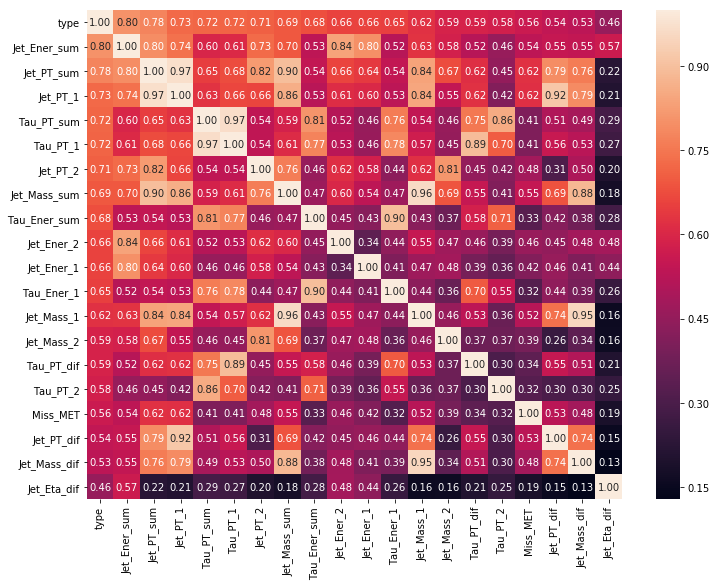

In [9]:
# Correlation matrix ordered by correlation with type

k = 20
f,ax =  plt.subplots(figsize=(12,9))
cols = corrmat.nlargest(k, 'type')['type'].index
cm = np.corrcoef(signal[cols].values.T)
heatmap = sb.heatmap(cm,annot=True,fmt='.2f',yticklabels=cols.values,xticklabels=cols.values)

According to the previous ranking and preventing *multicolinearity*, in each group of variables it will selected the one with highest correlation with **type**. Let's choose the following variables:
    - Jet_PT_sum
    - Jet_Ener_sum
    - Tau_PT_sum
    - Jet_Mass_sum
    - Miss_MET
    - Jet_Eta_dif
    - Tau_Ener_1

In [40]:
X_selected = Xsignal[['Jet_Ener_sum','Jet_PT_sum','Tau_PT_sum','Jet_Mass_sum','Miss_MET','Jet_Eta_dif','Tau_Ener_1']]
X_selected.describe()

,Jet_Ener_sum,Jet_PT_sum,Tau_PT_sum,Jet_Mass_sum,Miss_MET,Jet_Eta_dif,Tau_Ener_1
count,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000
mean,1061.583988,247.234646,234.287704,31.968358,90.078225,3.648321,272.559406
std,990.120700,220.053715,232.099882,30.361621,99.134768,1.430531,260.978547
min,20.304800,16.278400,17.386300,0.000000,0.471265,0.101081,10.804500
25%,167.588250,57.851350,60.903275,8.609842,24.589100,2.716905,71.195875
50%,801.182000,169.745000,136.485500,20.357300,51.789550,3.779675,191.929000
75%,1787.437500,406.933000,366.700500,43.567175,119.885500,4.572400,390.748000
max,5145.800000,1066.760000,1925.890000,153.864000,1252.410000,7.731700,1880.500000


### Inputing outliers

### Separabilty of Data

To get a better approach to the data and how it is compound, it's possible to make a scatter plot across all variables. The idea is to know how would be the better function that can separate the data between **signal** and **background**.

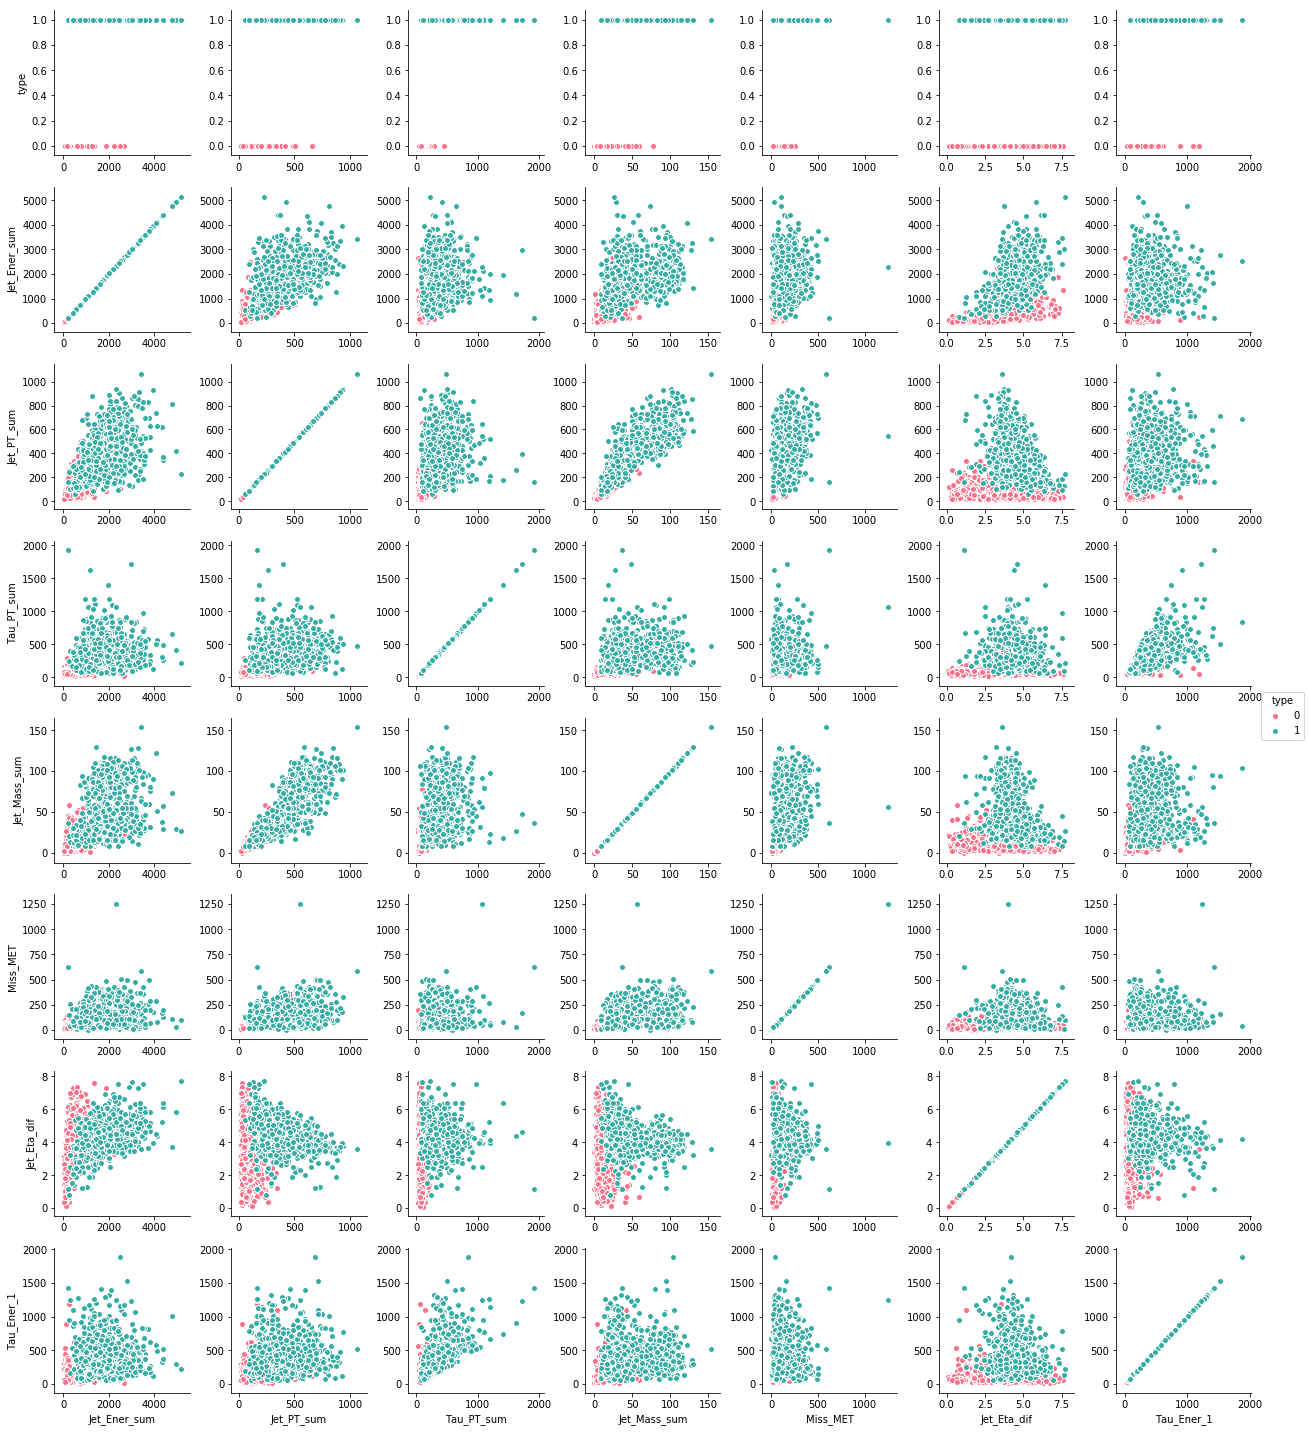

In [41]:
sb.pairplot(signal,hue='type',diag_kind='kde',palette='husl',x_vars=['Jet_Ener_sum','Jet_PT_sum','Tau_PT_sum','Jet_Mass_sum','Miss_MET','Jet_Eta_dif','Tau_Ener_1'],y_vars=['type','Jet_Ener_sum','Jet_PT_sum','Tau_PT_sum','Jet_Mass_sum','Miss_MET','Jet_Eta_dif','Tau_Ener_1']);

The below graph shows that doesn't exist a linear function that can separate the data easily. Additionaly, the background data area highly concentrated in some ranges, so let's *log-transformated* the data in other to get a higher separation.

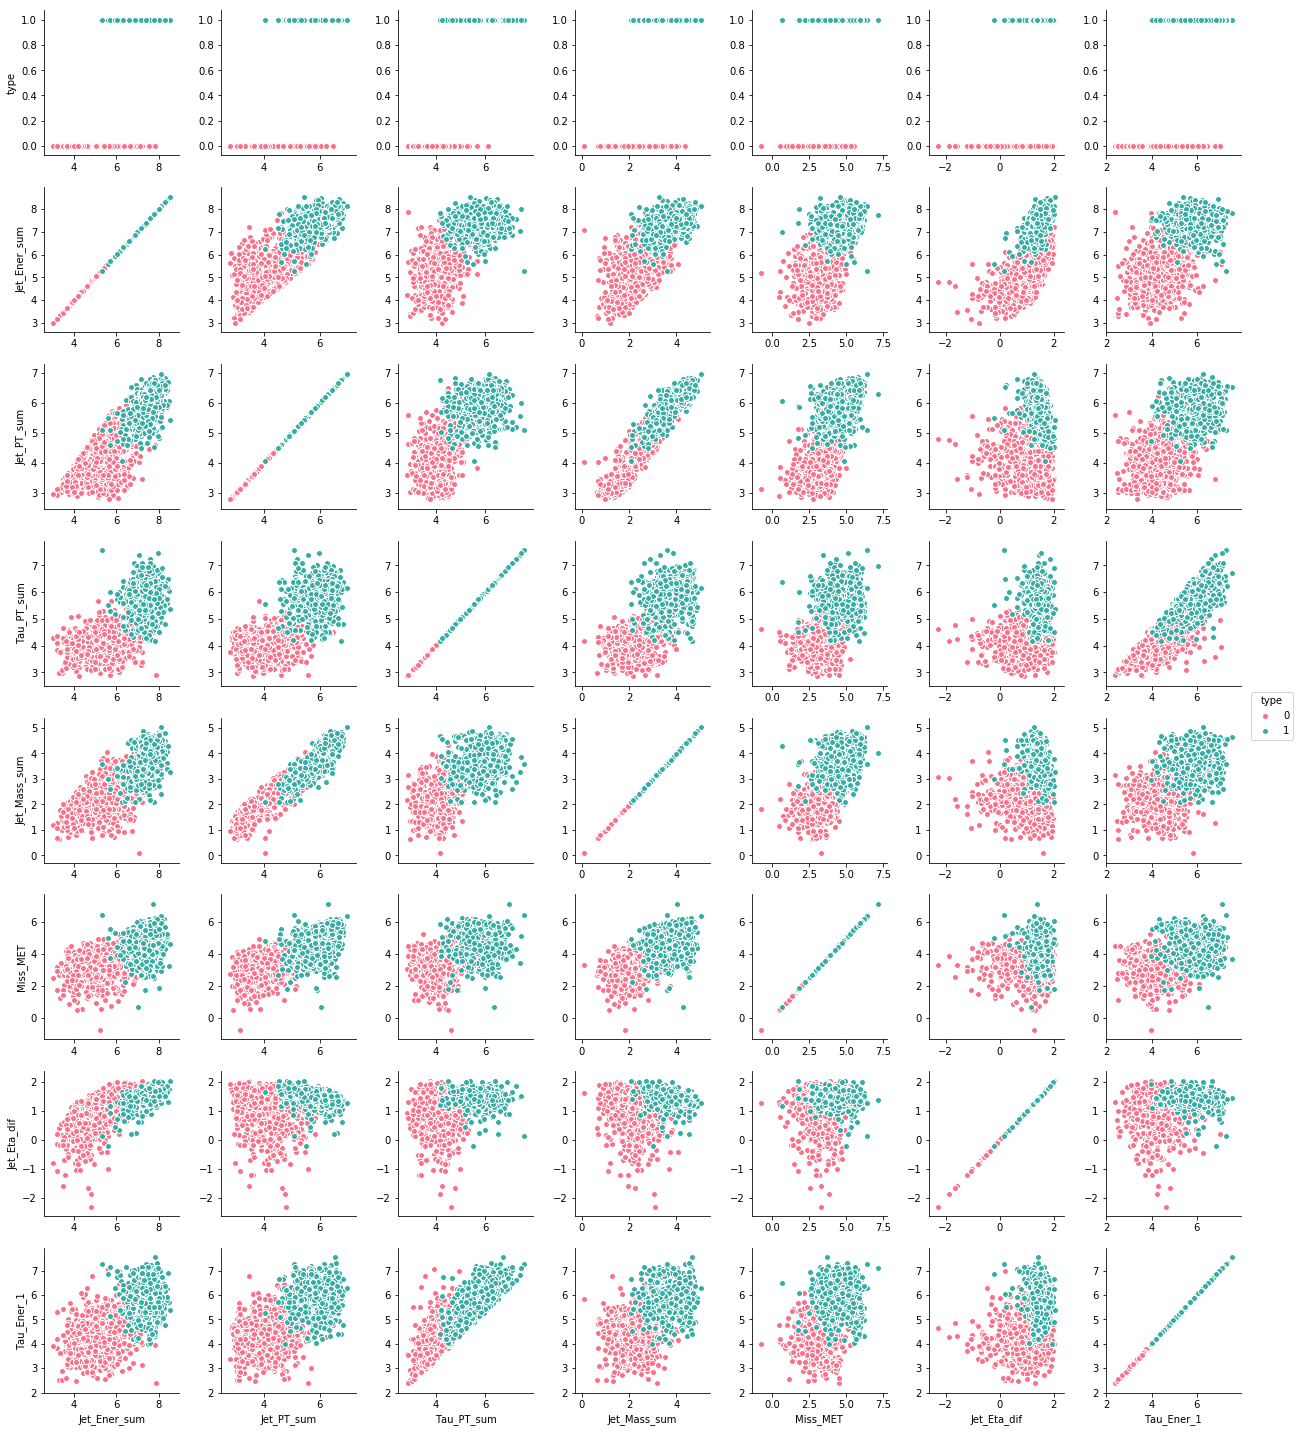

In [42]:
sb.pairplot(pd.concat([Ysignal,log(X_selected)],axis=1),hue='type',diag_kind='kde',palette='husl',x_vars=['Jet_Ener_sum','Jet_PT_sum','Tau_PT_sum','Jet_Mass_sum','Miss_MET','Jet_Eta_dif','Tau_Ener_1'],y_vars=['type','Jet_Ener_sum','Jet_PT_sum','Tau_PT_sum','Jet_Mass_sum','Miss_MET','Jet_Eta_dif','Tau_Ener_1']);

In this approach we can see a more clear separation that the previous figure, even it's possible to think that it would exist a linear function that can divide the data between **signal** and **background**

To confirm how have changed the data, let's see the empirical distributions before and after transformation.

In [43]:
def makeJoinHist(dataframe,varname):  
    leg =['1','0']
    fig, ax = plt.subplots()
    sb.distplot(dataframe[signal['type']==1][varname], ax = ax, label="Z'->tt",color='b')
    sb.distplot(dataframe[signal['type']==0][varname], ax = ax, label='SM Background',color='r')
    fig.legend()

Text(0.5,1,u'Log-transformation')

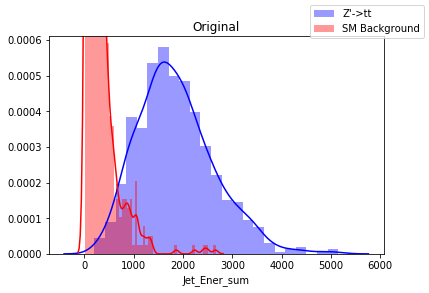

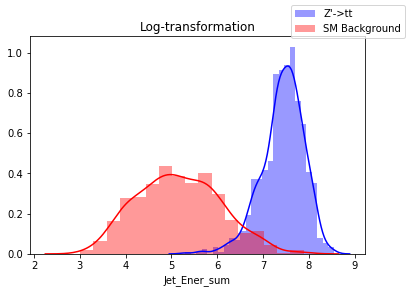

In [44]:
makeJoinHist(X_selected,'Jet_Ener_sum')
plt.title("Original")
makeJoinHist(log(X_selected),'Jet_Ener_sum')
plt.title("Log-transformation")

Text(0.5,1,u'Log-transformation')

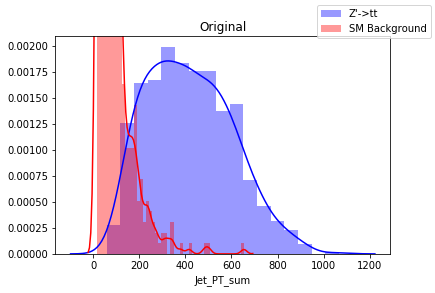

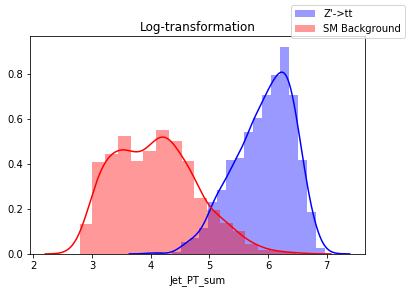

In [45]:
makeJoinHist(X_selected,'Jet_PT_sum')
plt.title("Original")
makeJoinHist(log(X_selected),'Jet_PT_sum')
plt.title("Log-transformation")

Text(0.5,1,u'Log-transformation')

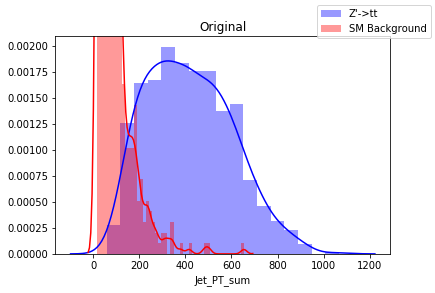

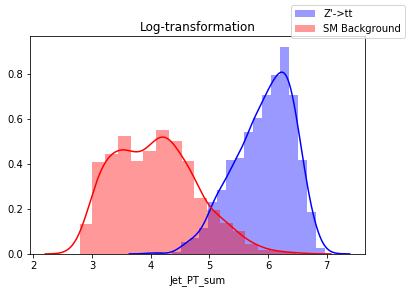

In [46]:
makeJoinHist(X_selected,'Jet_PT_sum')
plt.title("Original")
makeJoinHist(log(X_selected),'Jet_PT_sum')
plt.title("Log-transformation")

Text(0.5,1,u'Log-transformation')

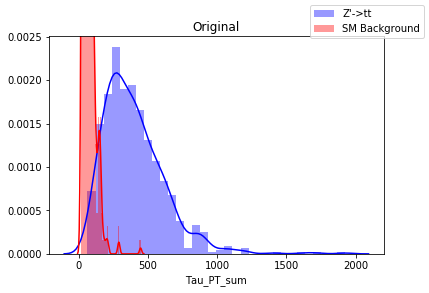

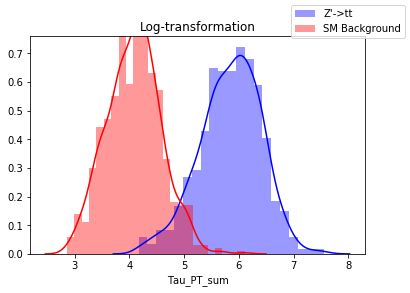

In [47]:
makeJoinHist(X_selected,'Tau_PT_sum')
plt.title("Original")
makeJoinHist(log(X_selected),'Tau_PT_sum')
plt.title("Log-transformation")

OverflowError: cannot convert float infinity to integer

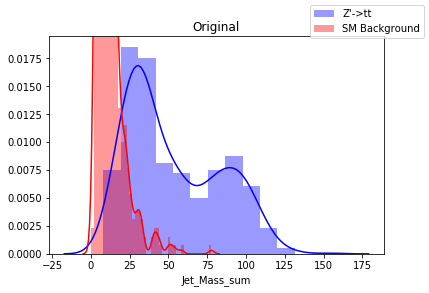

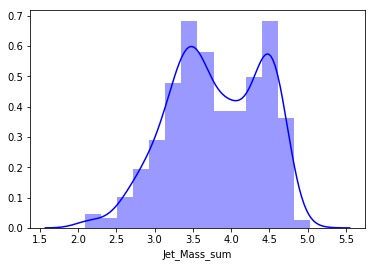

In [49]:
makeJoinHist(X_selected,'Jet_Mass_sum')
plt.title("Original")
makeJoinHist(log(X_selected),'Jet_Mass_sum')
plt.title("Log-transformation")

In [ ]:
makeJoinHist(Xsignal,'Miss_MET')
plt.title("Original")
makeJoinHist(log(Xsignal),'Miss_MET')
plt.title("Log-transformation")

In [ ]:
makeJoinHist(Xsignal,'Tau_PT_sum')
plt.title("Original")
makeJoinHist(log(Xsignal),'Tau_PT_sum')
plt.title("Log-transformation")

In [ ]:
makeJoinHist(Xsignal,'Jet_Eta_dif')
plt.title("Original")
makeJoinHist(log(Xsignal),'Jet_Eta_dif')
plt.title("Log-transformation")

In [ ]:
makeJoinHist(Xsignal,'Tau_Ener_1')
plt.title("Original")
makeJoinHist(log(Xsignal),'Tau_Ener_1')
plt.title("Log-transformation")

All variables have a significant improvement in the distribution by **type** of event, except **Jet_Eta_dif**. However, it would take the log transformation over all variables because models seems to dont have any preference over the transformation of **Jet_Eta_dif**

In [24]:
#X_final = log(X_selected.drop(['Jet_Eta_dif'],axis=1))
#X_final = pd.concat([X_final,X_selected['Jet_Eta_dif']],axis=1)
#X_final.describe()
X_final = log(X_selected) 

### Preprocessing 
To introduce the data in the model, it must normalize the data with $\mu = 0$ and $\sigma = 1$

In [25]:
# Normalization of data
from sklearn.preprocessing import scale

XlogScale = scale(X_final)
XlogScale = pd.DataFrame(XlogScale)
XlogScale.columns = X_selected.columns
XlogScale.describe()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

The data will be splitted between train and test samples in a $1:1$ relation

In [25]:
# Split of data 
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(XlogScale,Ysignal,test_size=.5)

/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Model Implementation

### Logistic Regression

The first model to implement supposse a linear separation of data, according to the previous graphs. 
``` 
It will be used the default configuration of *hyperparameters*
```

In [26]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()
logReg.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
Y_pred_logReg = logReg.predict(X_test)

In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test,Y_pred_logReg)
confusion_matrix

array([[813,  17],
       [ 12, 863]])

In [29]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred_logReg))

             precision    recall  f1-score   support

          0       0.99      0.98      0.98       830
          1       0.98      0.99      0.98       875

avg / total       0.98      0.98      0.98      1705



### Neural Network - MultiLayer Perceptron

The second model with higher complexity incorporate some non-linearities that could have a better fitting of the data.

In [30]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs',hidden_layer_sizes=(7,5,3),max_iter=500)
clf.fit(X_train,Y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(7, 5, 3), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [31]:
Y_pred_NN = clf.predict(X_test)

In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test,Y_pred_NN)
confusion_matrix

array([[807,  23],
       [ 19, 856]])

In [33]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred_NN))

             precision    recall  f1-score   support

          0       0.98      0.97      0.97       830
          1       0.97      0.98      0.98       875

avg / total       0.98      0.98      0.98      1705



### Support Vector Machine

The last model assumes a gaussian kernel to separate data

In [34]:
from sklearn import svm
svmodel = svm.SVC(kernel = 'rbf')
svmodel.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [35]:
Y_pred_SVM = svmodel.predict(X_test)

In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test,Y_pred_SVM)
confusion_matrix

array([[810,  20],
       [ 12, 863]])

In [37]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred_SVM))

             precision    recall  f1-score   support

          0       0.99      0.98      0.98       830
          1       0.98      0.99      0.98       875

avg / total       0.98      0.98      0.98      1705



# Significance